Attrition of nurses in the US Healthcare system is at an all-time high. It is a major area of focus, especially for hospitals.

This dataset contains employee and company data useful for supervised ML, unsupervised ML, and analytics. Attrition - whether an employee left or not - is included and can be used as the target variable.

The data is synthetic and based on the IBM Watson dataset for attrition. Employee roles and departments were changed to reflect the healthcare domain. Also, known outcomes for some employees were changed to help increase the performance of ML models.

Here's an app I use as a demo based on this dataset and an ML classification model.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy
import statsmodels
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\imvv44\\Downloads\\watson_healthcare_modified.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [4]:
df.shape

(1676, 35)

In [5]:
df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [6]:
df.drop('EmployeeID',inplace=True,axis=1)#id is of no use

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,2.738663,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,1.104005,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.dtypes.index

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
## selecting all categorical variable columns
categorical_columns = df.dtypes[df.dtypes == 'object'].index
print(categorical_columns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [11]:
## selecting all Numericalvariable columns
Numerical_columns = df.dtypes[df.dtypes == 'int64'].index
print(Numerical_columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


# Attrition
target variable

In [12]:
df.Attrition.value_counts()

No     1477
Yes     199
Name: Attrition, dtype: int64

In [13]:
df.BusinessTravel.value_counts()

Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: BusinessTravel, dtype: int64

In [14]:
df.Department.value_counts()

Maternity     796
Cardiology    531
Neurology     349
Name: Department, dtype: int64

In [15]:
df.EducationField.value_counts()

Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: EducationField, dtype: int64

In [16]:
df.Gender.value_counts()

Male      998
Female    678
Name: Gender, dtype: int64

In [17]:
df.JobRole.value_counts()

Nurse             822
Other             534
Therapist         189
Administrative    115
Admin              16
Name: JobRole, dtype: int64

In [18]:
df.MaritalStatus.value_counts()

Married     777
Single      522
Divorced    377
Name: MaritalStatus, dtype: int64

In [19]:
df.Over18.value_counts()

Y    1676
Name: Over18, dtype: int64

In [20]:
df.OverTime.value_counts()

No     1200
Yes     476
Name: OverTime, dtype: int64

In [21]:
le=LabelEncoder()

In [22]:
df.Attrition=le.fit_transform(df.Attrition)
df.Gender=le.fit_transform(df.Gender)
df.OverTime=le.fit_transform(df.OverTime)
df.Over18=le.fit_transform(df.Over18)
df.MaritalStatus=le.fit_transform(df.MaritalStatus)
df.JobRole=le.fit_transform(df.JobRole)
df.EducationField=le.fit_transform(df.EducationField)
df.Department=le.fit_transform(df.Department)
df.BusinessTravel=le.fit_transform(df.BusinessTravel)


# Attrition
Target Variable

<AxesSubplot:xlabel='Attrition', ylabel='count'>

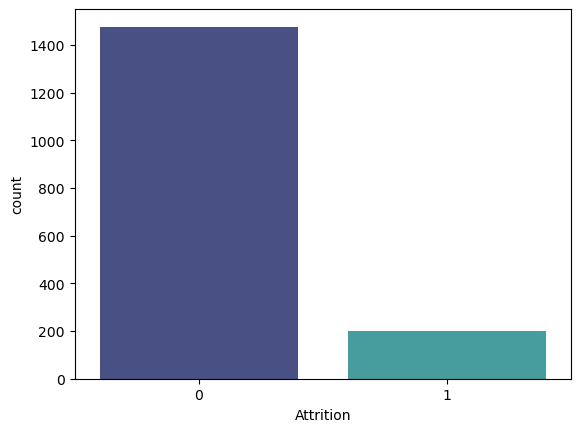

In [23]:
sns.countplot(df.Attrition,palette='mako')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1676 non-null   int64
 1   Attrition                 1676 non-null   int32
 2   BusinessTravel            1676 non-null   int32
 3   DailyRate                 1676 non-null   int64
 4   Department                1676 non-null   int32
 5   DistanceFromHome          1676 non-null   int64
 6   Education                 1676 non-null   int64
 7   EducationField            1676 non-null   int32
 8   EmployeeCount             1676 non-null   int64
 9   EnvironmentSatisfaction   1676 non-null   int64
 10  Gender                    1676 non-null   int32
 11  HourlyRate                1676 non-null   int64
 12  JobInvolvement            1676 non-null   int64
 13  JobLevel                  1676 non-null   int64
 14  JobRole                   1676 non-null 

In [25]:
x = df.drop("Attrition",axis = 1)
y = df["Attrition"]

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20, stratify=y)

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [28]:
p_x=lr.predict(xtest)

In [29]:
base_model_logistic_regression=accuracy_score(ytest,p_x)
base_model_logistic_regression

0.882703777335984

In [30]:
data1=df.copy()

In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1676 non-null   int64
 1   Attrition                 1676 non-null   int32
 2   BusinessTravel            1676 non-null   int32
 3   DailyRate                 1676 non-null   int64
 4   Department                1676 non-null   int32
 5   DistanceFromHome          1676 non-null   int64
 6   Education                 1676 non-null   int64
 7   EducationField            1676 non-null   int32
 8   EmployeeCount             1676 non-null   int64
 9   EnvironmentSatisfaction   1676 non-null   int64
 10  Gender                    1676 non-null   int32
 11  HourlyRate                1676 non-null   int64
 12  JobInvolvement            1676 non-null   int64
 13  JobLevel                  1676 non-null   int64
 14  JobRole                   1676 non-null 

# Age

In [32]:
data1.Age.value_counts()

35    88
34    85
29    82
31    82
36    81
32    68
38    68
40    64
30    63
33    62
28    59
27    59
37    57
42    52
39    47
26    46
45    45
41    43
46    38
43    37
44    36
50    33
25    30
49    29
24    29
47    28
55    25
53    25
48    23
52    21
54    20
51    20
22    18
23    17
58    17
56    15
21    14
20    13
19    10
59    10
18     8
60     5
57     4
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

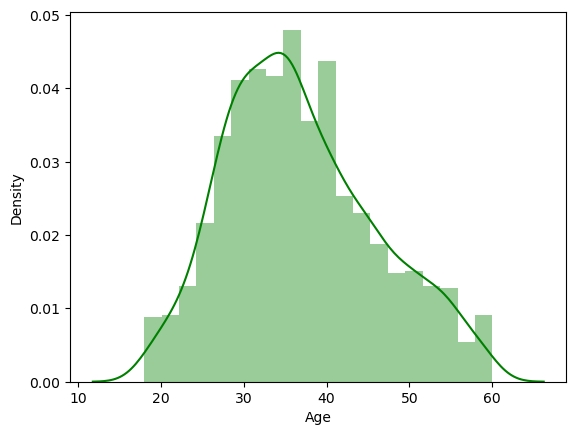

In [33]:
sns.distplot(data1.Age,color='g')

<AxesSubplot:xlabel='Age'>

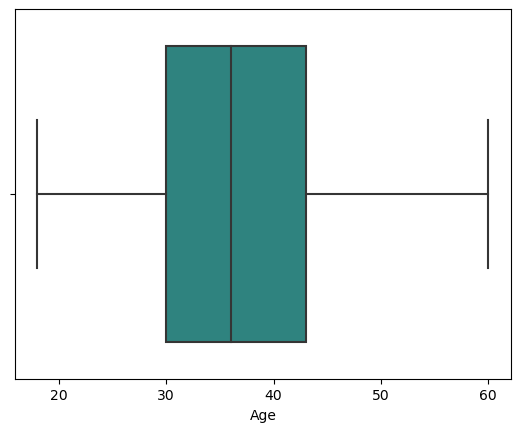

In [34]:
sns.boxplot(data1.Age,palette='viridis')

In [35]:
model = ols("Age~Attrition", data1).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df        sum_sq     mean_sq          F  PR(>F)
Attrition     1.0    8039.64692  8039.64692  102.30112     0.0
Residual   1674.0  131556.41514    78.58806        NaN     NaN


# Daily Rate

In [36]:
data1.DailyRate.value_counts()

691     7
1329    7
1082    6
444     6
530     6
       ..
1126    1
974     1
905     1
1151    1
1102    1
Name: DailyRate, Length: 886, dtype: int64

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

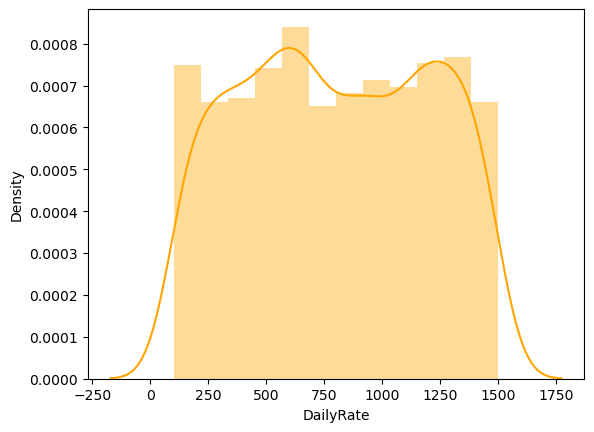

In [37]:
sns.distplot(data1.DailyRate,color='orange')

<AxesSubplot:xlabel='DailyRate'>

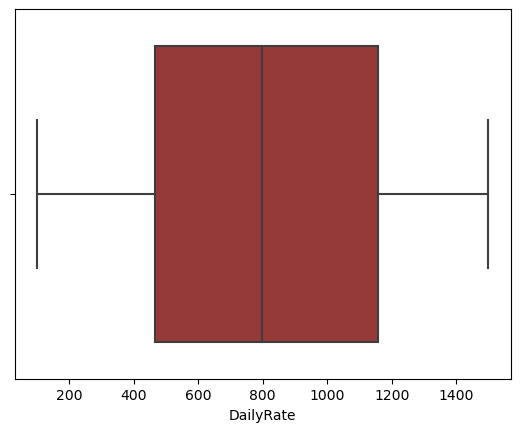

In [38]:
sns.boxplot(data1.DailyRate,color='brown')

In [39]:
model = ols("DailyRate~Attrition", data1).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df        sum_sq       mean_sq        F   PR(>F)
Attrition     1.0  7.845809e+05  784580.93018  4.87603  0.02737
Residual   1674.0  2.693562e+08  160905.74938      NaN      NaN


# Education

In [40]:
data1.Education.value_counts()#ordnal

3    655
4    447
2    322
1    196
5     56
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

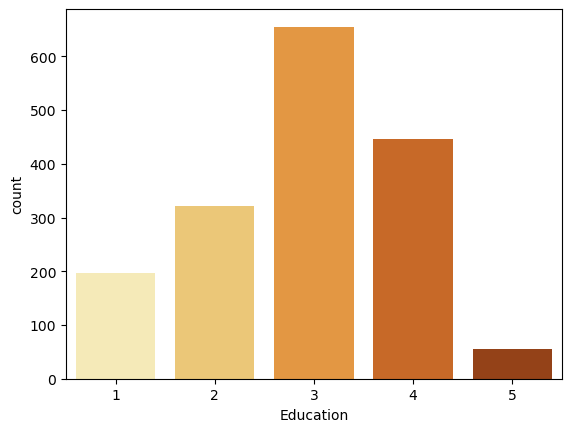

In [41]:
sns.countplot(data1.Education,palette='YlOrBr')

<AxesSubplot:xlabel='Education'>

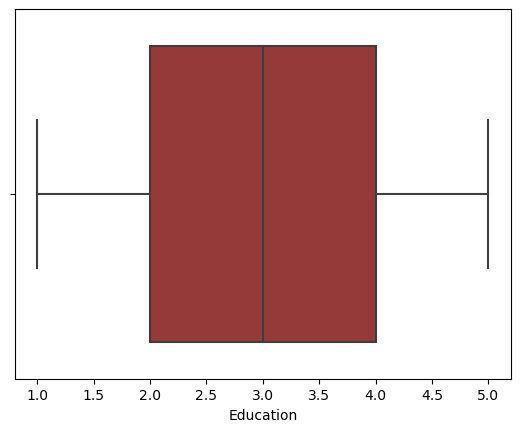

In [42]:
sns.boxplot(data1.Education,color='brown')

In [43]:
pd.crosstab(data1.Attrition, data1.Education, margins = True)

Education,1,2,3,4,5,All
Attrition,,,,,,
0,169,287,566,400,55,1477
1,27,35,89,47,1,199
All,196,322,655,447,56,1676


In [44]:
data_dept_ct= np.array([[169,287,566,400,55],[27,35,89,47,1]])
scipy.stats.chi2_contingency(data_dept_ct, correction= False )

(9.062518505145688,
 0.059555671404858734,
 4,
 array([[172.72792363, 283.7673031 , 577.22852029, 393.92541766,
          49.35083532],
        [ 23.27207637,  38.2326969 ,  77.77147971,  53.07458234,
           6.64916468]]))

# EmployeeCount

In [45]:
data1.EmployeeCount.value_counts()

1    1676
Name: EmployeeCount, dtype: int64

In [46]:
data1.drop('EmployeeCount',axis=1,inplace=True)

# EnvironmentSatisfaction

In [47]:
data1.EnvironmentSatisfaction.value_counts()#orinal variable


3    512
4    508
1    330
2    326
Name: EnvironmentSatisfaction, dtype: int64

<AxesSubplot:xlabel='EnvironmentSatisfaction'>

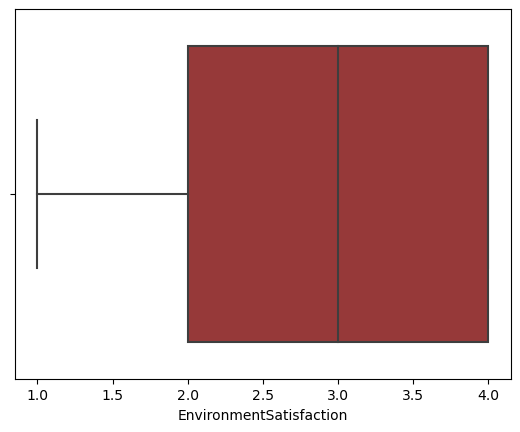

In [48]:
sns.boxplot(data1.EnvironmentSatisfaction,color='brown')

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

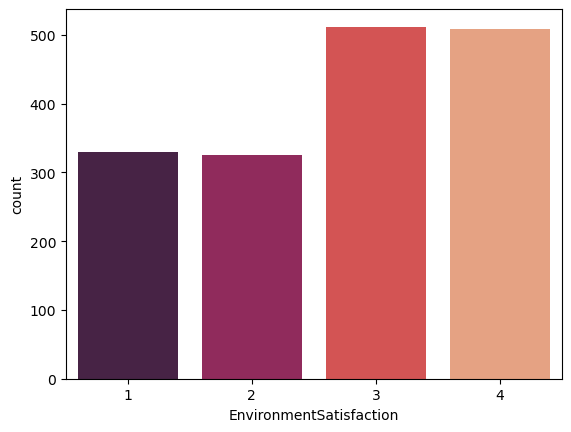

In [49]:
sns.countplot(data1.EnvironmentSatisfaction,palette='rocket')

In [50]:
pd.crosstab(data1.Attrition, data1.EnvironmentSatisfaction, margins = True)

EnvironmentSatisfaction,1,2,3,4,All
Attrition,,,,,
0,266,288,464,459,1477
1,64,38,48,49,199
All,330,326,512,508,1676


In [51]:
data_dept_ct= np.array([[266,288,464,459],[64,38,48,49]])
scipy.stats.chi2_contingency(data_dept_ct, correction= False )


(23.315499439704645,
 3.470723479594877e-05,
 3,
 array([[290.81742243, 287.29236277, 451.20763723, 447.68257757],
        [ 39.18257757,  38.70763723,  60.79236277,  60.31742243]]))

# HourlyRate

In [52]:
df.HourlyRate.value_counts()

48    35
84    34
79    33
66    33
42    33
      ..
50    17
93    17
68    17
38    16
34    14
Name: HourlyRate, Length: 71, dtype: int64

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

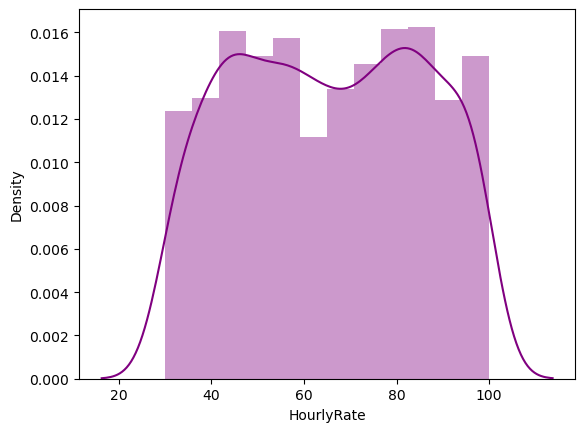

In [53]:
sns.distplot(data1.HourlyRate,color='purple')

<AxesSubplot:xlabel='HourlyRate'>

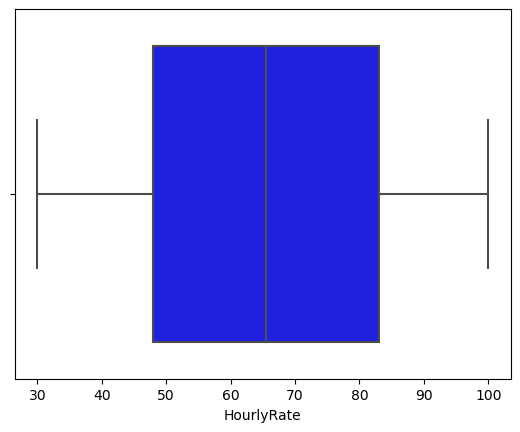

In [54]:
sns.boxplot(data1.HourlyRate,color='blue')

In [55]:
model = ols("HourlyRate~Attrition", data1).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df        sum_sq    mean_sq        F   PR(>F)
Attrition     1.0     901.26581  901.26581  2.20871  0.13742
Residual   1674.0  683078.24254  408.05152      NaN      NaN


In [56]:
data1.drop('HourlyRate',axis=1,inplace=True)#because p-value is greater than 0.05

# JobInvolvement

In [57]:
data1.JobInvolvement.value_counts()#orinal variablef

3    983
2    433
4    164
1     96
Name: JobInvolvement, dtype: int64

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

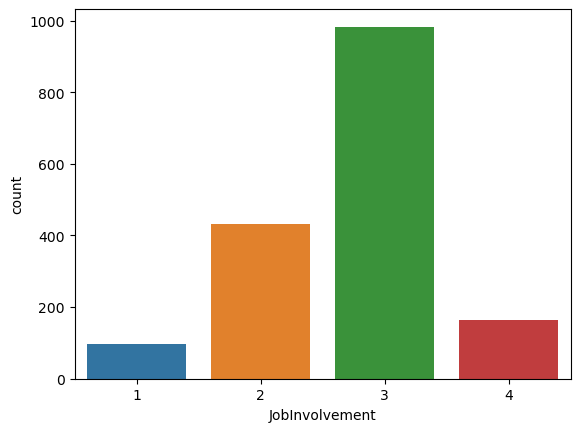

In [58]:
sns.countplot(data1.JobInvolvement)

In [59]:
pd.crosstab(data1.Attrition, data1.JobInvolvement, margins = True)

JobInvolvement,1,2,3,4,All
Attrition,,,,,
0,67,362,894,154,1477
1,29,71,89,10,199
All,96,433,983,164,1676


In [60]:
data_dept_ct= np.array([[67,362,894,154],[29,71,89,10]])
scipy.stats.chi2_contingency(data_dept_ct, correction= False )


(52.00747279458251,
 2.984116756064278e-11,
 3,
 array([[ 84.60143198, 381.58770883, 866.28341289, 144.5274463 ],
        [ 11.39856802,  51.41229117, 116.71658711,  19.4725537 ]]))

# JobLevel

In [61]:
data1.JobLevel.value_counts()#orinal variable

1    621
2    606
3    246
4    122
5     81
Name: JobLevel, dtype: int64

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

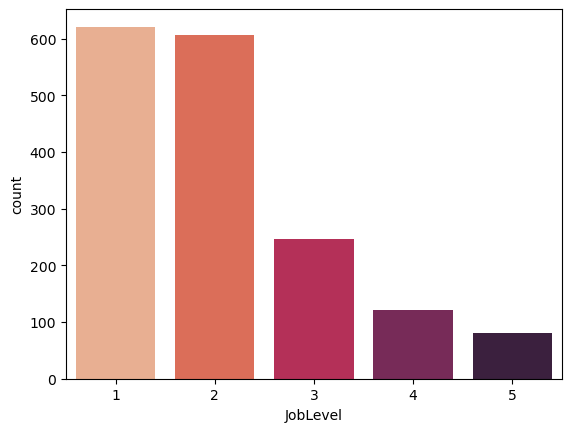

In [62]:
sns.countplot(data1.JobLevel,palette='rocket_r')

In [63]:
pd.crosstab(data1.Attrition, data1.JobLevel, margins = True)

JobLevel,1,2,3,4,5,All
Attrition,,,,,,
0,479,572,228,119,79,1477
1,142,34,18,3,2,199
All,621,606,246,122,81,1676


In [64]:
data_dept_ct= np.array([[479,572,228,119,79],[142,34,18,3,2]])
scipy.stats.chi2_contingency(data_dept_ct, correction= False )

(116.4954792325847,
 2.9922638605677435e-24,
 4,
 array([[547.26551313, 534.04653938, 216.79116945, 107.51431981,
          71.38245823],
        [ 73.73448687,  71.95346062,  29.20883055,  14.48568019,
           9.61754177]]))

# JobSatisfaction

In [65]:
data1.JobSatisfaction.value_counts()#orinal variable

4    530
3    507
1    329
2    310
Name: JobSatisfaction, dtype: int64

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

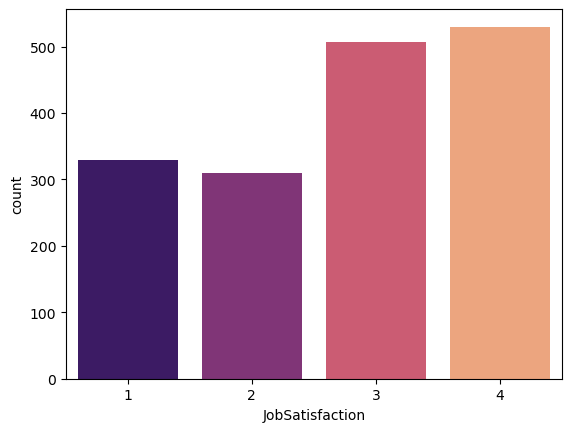

In [66]:
sns.countplot(data1.JobSatisfaction,palette='magma')

In [67]:
pd.crosstab(data1.Attrition, data1.JobSatisfaction, margins = True)

JobSatisfaction,1,2,3,4,All
Attrition,,,,,
0,277,268,447,485,1477
1,52,42,60,45,199
All,329,310,507,530,1676


In [68]:
data_dept_ct= np.array([[277,268,447,485],[52,42,60,45]])
scipy.stats.chi2_contingency(data_dept_ct, correction= False )

(11.489546204903462,
 0.009352917864491304,
 3,
 array([[289.93615752, 273.19212411, 446.80131265, 467.07040573],
        [ 39.06384248,  36.80787589,  60.19868735,  62.92959427]]))

# MonthlyIncome

In [69]:
data1.MonthlyIncome.value_counts()#orinal variable

2741     4
2340     4
5562     4
2342     4
5993     3
        ..
10475    1
4960     1
7625     1
6796     1
2836     1
Name: MonthlyIncome, Length: 1349, dtype: int64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

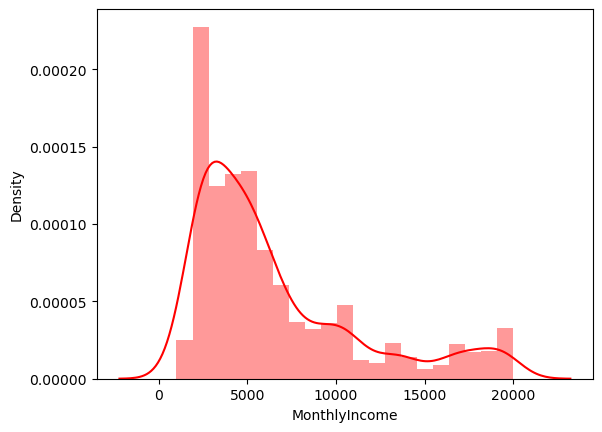

In [70]:
sns.distplot(data1.MonthlyIncome,color='r')

<AxesSubplot:xlabel='MonthlyIncome'>

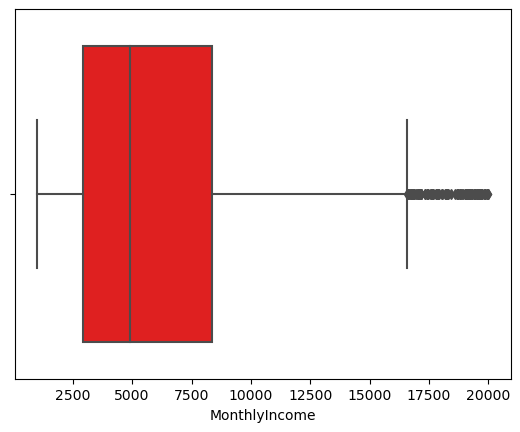

In [71]:
sns.boxplot(data1.MonthlyIncome,color='r')

In [72]:
q3=data1.MonthlyIncome.quantile(0.75)
q1=data1.MonthlyIncome.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)

In [73]:
data1.MonthlyIncome=np.where(data1.MonthlyIncome>upper,upper,df.MonthlyIncome)

<AxesSubplot:xlabel='MonthlyIncome'>

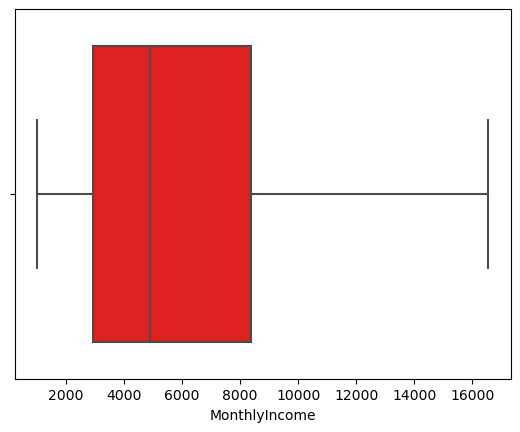

In [74]:
sns.boxplot(data1.MonthlyIncome,color='r')

In [75]:
model = ols("MonthlyIncome~Attrition", data1).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df        sum_sq       mean_sq         F  PR(>F)
Attrition     1.0  1.275828e+09  1.275828e+09  69.69261     0.0
Residual   1674.0  3.064508e+10  1.830650e+07       NaN     NaN


# MonthlyRate

In [76]:
data1.MonthlyRate.value_counts()

4223     4
19373    4
11652    3
9150     3
7744     3
        ..
17654    1
15232    1
18959    1
7791     1
26997    1
Name: MonthlyRate, Length: 1427, dtype: int64

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

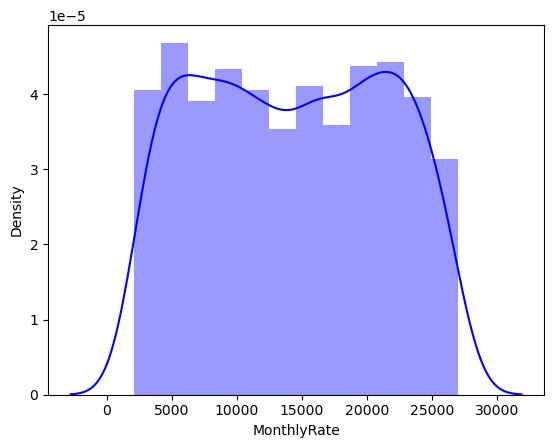

In [77]:
sns.distplot(data1.MonthlyRate,color='b')

<AxesSubplot:xlabel='MonthlyRate'>

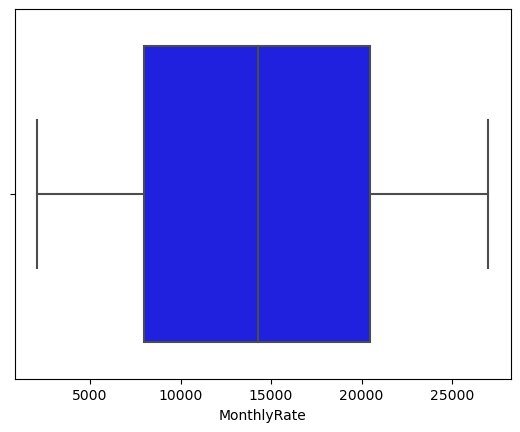

In [78]:
sns.boxplot(data1.MonthlyRate,color='b')

In [79]:
model = ols("MonthlyRate~Attrition", data1).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df        sum_sq       mean_sq        F   PR(>F)
Attrition     1.0  1.786274e+08  1.786274e+08  3.51027  0.06116
Residual   1674.0  8.518488e+10  5.088703e+07      NaN      NaN


In [80]:
data1.drop('MonthlyRate',inplace=True,axis=1)#because p-value is greater than 0.05

# NumCompaniesWorked

In [81]:
data1.NumCompaniesWorked.value_counts()#orinal variable

1    601
0    223
3    180
2    173
4    156
7     84
6     79
5     70
9     59
8     51
Name: NumCompaniesWorked, dtype: int64

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

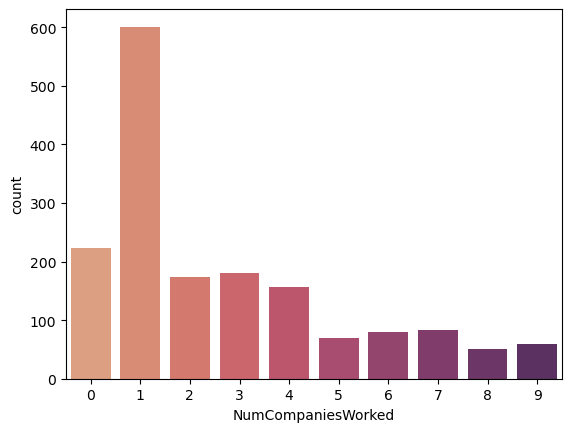

In [82]:
sns.countplot(data1.NumCompaniesWorked,palette='flare')

In [83]:
pd.crosstab(data1.Attrition, data1.NumCompaniesWorked, margins = True)

NumCompaniesWorked,0,1,2,3,4,5,6,7,8,9,All
Attrition,,,,,,,,,,,
0,203,508,163,170,145,58,64,68,47,51,1477
1,20,93,10,10,11,12,15,16,4,8,199
All,223,601,173,180,156,70,79,84,51,59,1676


In [84]:
data_dept_ct= np.array([[203,508,163,170,145,58,64,68,47,51],[20,93,10,10,11,12,15,16,4,8]])
scipy.stats.chi2_contingency(data_dept_ct, correction= False )

(36.478670992700316,
 3.259510514390069e-05,
 9,
 array([[196.52207637, 529.6402148 , 152.45883055, 158.62768496,
         137.47732697,  61.68854415,  69.6199284 ,  74.02625298,
          44.94451074,  51.99463007],
        [ 26.47792363,  71.3597852 ,  20.54116945,  21.37231504,
          18.52267303,   8.31145585,   9.3800716 ,   9.97374702,
           6.05548926,   7.00536993]]))

# PercentSalaryHike

In [85]:
data1.PercentSalaryHike.value_counts()#orinal variable

11    241
13    236
14    229
12    227
15    114
18    103
17     93
19     92
16     89
20     63
22     60
21     54
23     31
24     23
25     21
Name: PercentSalaryHike, dtype: int64

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

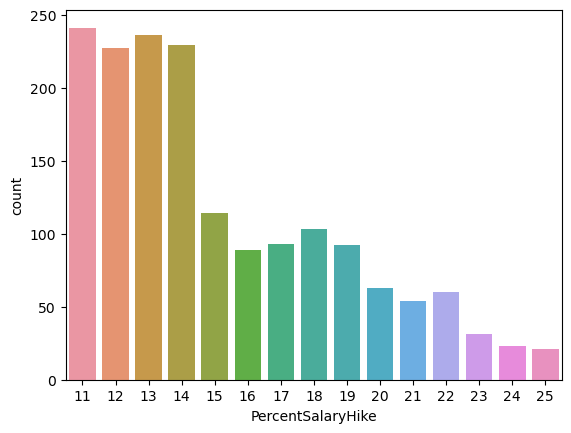

In [86]:
sns.countplot(data1.PercentSalaryHike)

In [87]:
pd.crosstab(data1.Attrition, data1.PercentSalaryHike, margins = True)

PercentSalaryHike,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,All
Attrition,,,,,,,,,,,,,,,,
0,208,203,202,209,102,80,84,88,81,55,50,51,25,19,20,1477
1,33,24,34,20,12,9,9,15,11,8,4,9,6,4,1,199
All,241,227,236,229,114,89,93,103,92,63,54,60,31,23,21,1676


In [88]:
data_dept_ct= np.array([[208,203,202,209,102,80,84,88,81,55,50,51,25,19,20],[33,24,34,20,12,9,9,15,11,8,4,9,6,4,1]])
scipy.stats.chi2_contingency(data_dept_ct, correction= False )

(11.3106934553017,
 0.6614745528981447,
 14,
 array([[212.38484487, 200.04713604, 207.97852029, 201.80966587,
         100.46420048,  78.43257757,  81.95763723,  90.7702864 ,
          81.07637232,  55.51968974,  47.58830549,  52.87589499,
          27.31921241,  20.26909308,  18.50656325],
        [ 28.61515513,  26.95286396,  28.02147971,  27.19033413,
          13.53579952,  10.56742243,  11.04236277,  12.2297136 ,
          10.92362768,   7.48031026,   6.41169451,   7.12410501,
           3.68078759,   2.73090692,   2.49343675]]))

In [89]:
a=pd.crosstab(data1.PercentSalaryHike,data1.Attrition)#another code for chi square
chi2_contingency(a)[1]

0.6614745528981447

In [90]:
data1.drop('PercentSalaryHike',inplace=True,axis=1)#because p-value is greater than 0.05

# PerformanceRating

In [91]:
data1.PerformanceRating.value_counts()#orinal variable

3    1424
4     252
Name: PerformanceRating, dtype: int64

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

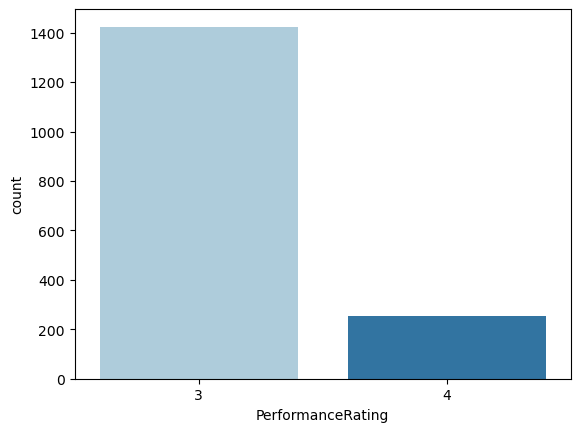

In [92]:
sns.countplot(data1.PerformanceRating,palette='Paired')

In [93]:
a=pd.crosstab(data1.PerformanceRating,data1.Attrition)
chi2_contingency(a)[1]

0.7387227176552524

In [94]:
data1.drop('PerformanceRating',inplace=True,axis=1)#because p-value is greater than 0.05

# RelationshipSatisfaction

In [95]:
data1.RelationshipSatisfaction.value_counts()#orinal variable

3    526
4    494
2    346
1    310
Name: RelationshipSatisfaction, dtype: int64

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

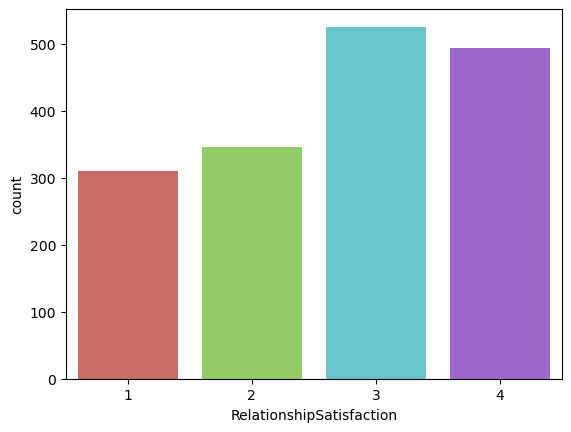

In [96]:
sns.countplot(data1.RelationshipSatisfaction,palette='hls')

In [97]:
a=pd.crosstab(data1.RelationshipSatisfaction,data1.Attrition)
chi2_contingency(a)[1]

0.6642282385523428

In [98]:
data1.drop('RelationshipSatisfaction',inplace=True,axis=1)#because p-value is greater than 0.05

# StandardHours

In [99]:
data1.StandardHours.value_counts()

80    1676
Name: StandardHours, dtype: int64

In [100]:
data1.drop('StandardHours',inplace=True,axis=1)#there is only one valuedf.drop('StandardHours',inplace=True,axis=1)#there is only one value

# Shift

In [101]:
data1.Shift.value_counts()#orinal variable

0    708
1    684
2    185
3     99
Name: Shift, dtype: int64

<AxesSubplot:xlabel='Shift', ylabel='count'>

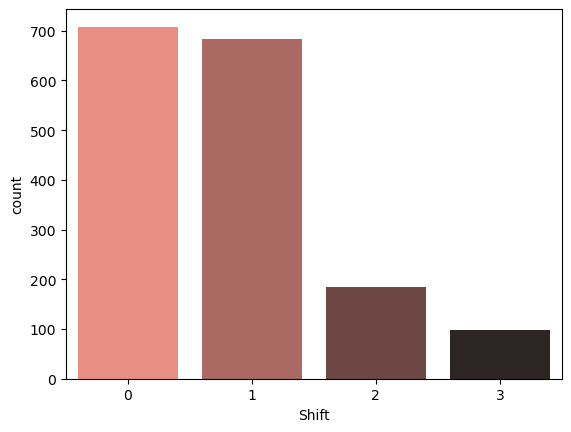

In [102]:
sns.countplot(data1.Shift,palette='dark:salmon_r')

In [103]:
a=pd.crosstab(data1.Shift,data1.Attrition)
chi2_contingency(a)[1]

1.388623941811363e-16

# TotalWorkingYears

In [104]:
data1.TotalWorkingYears.value_counts()#orinal variable

10    233
6     140
8     123
9     108
5     100
1      94
7      88
4      70
12     51
3      50
15     47
17     40
16     40
11     39
13     39
21     39
2      36
14     35
20     34
18     30
23     27
22     25
19     25
24     22
25     17
28     16
26     15
31     12
29     12
32     11
0      11
30      8
33      8
36      7
27      7
34      6
37      4
35      4
40      2
38      1
Name: TotalWorkingYears, dtype: int64

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

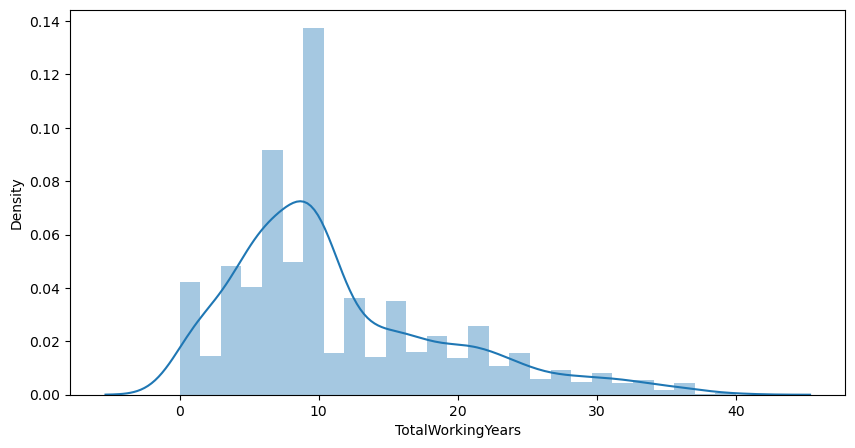

In [105]:
plt.figure(figsize=(10,5))
sns.distplot(data1.TotalWorkingYears)

In [106]:
model = ols("YearsWithCurrManager~Attrition", data1).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df       sum_sq    mean_sq         F  PR(>F)
Attrition     1.0    858.21948  858.21948  70.54193     0.0
Residual   1674.0  20366.03529   12.16609       NaN     NaN


# TrainingTimesLastYear

In [107]:
data1.TrainingTimesLastYear.value_counts()#orinal variable

2    611
3    567
4    143
5    137
1     84
6     73
0     61
Name: TrainingTimesLastYear, dtype: int64

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

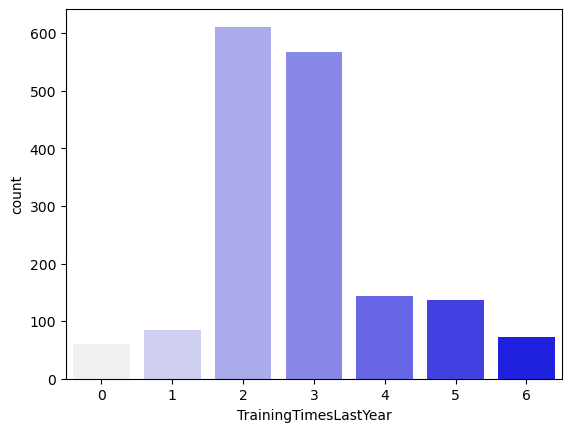

In [108]:
sns.countplot(data1.TrainingTimesLastYear,palette='light:b')

In [109]:
a=pd.crosstab(data1.TrainingTimesLastYear,data1.Attrition)
chi2_contingency(a)[1]

0.0030345241109726554

# WorkLifeBalance

In [110]:
data1.WorkLifeBalance.value_counts()#orinal variable

3    1028
2     385
4     173
1      90
Name: WorkLifeBalance, dtype: int64

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

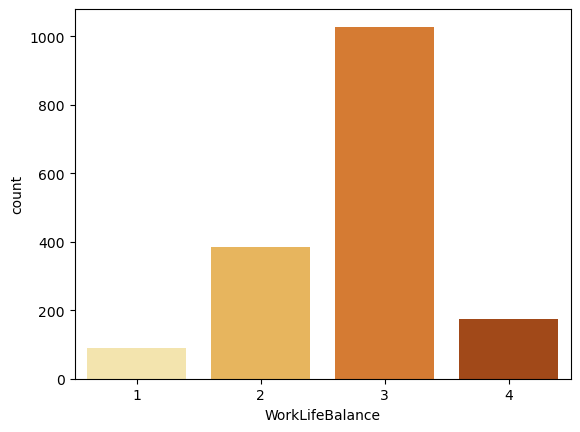

In [111]:
sns.countplot(data1.WorkLifeBalance,palette='YlOrBr')

In [112]:
a=pd.crosstab(data1.WorkLifeBalance,data1.Attrition)
chi2_contingency(a)[1]

1.4980223398086616e-05

# YearsAtCompany

In [113]:
data1.YearsAtCompany.value_counts()#orinal variable

5     219
1     195
3     152
2     146
10    137
4     120
7     104
9      94
8      93
6      86
0      46
11     37
20     32
13     28
15     23
14     20
22     19
12     17
21     17
19     14
18     13
16     12
17     12
24      7
33      6
25      5
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

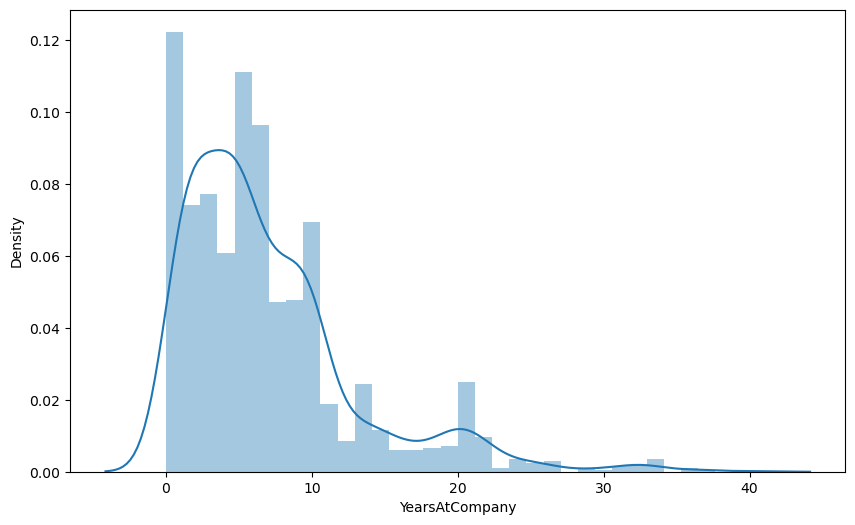

In [114]:
plt.figure(figsize=(10,6))
sns.distplot(data1.YearsAtCompany)

In [115]:
a=pd.crosstab(data1.YearsAtCompany,data1.Attrition)
chi2_contingency(a)[1]

5.4853064231239483e-17

# YearsInCurrentRole

In [116]:
data1.YearsSinceLastPromotion.value_counts()#orinal variable


0     660
1     402
2     186
7      83
3      66
4      63
5      50
6      41
11     30
8      21
9      20
15     15
13     12
12     11
14      9
10      7
Name: YearsSinceLastPromotion, dtype: int64

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

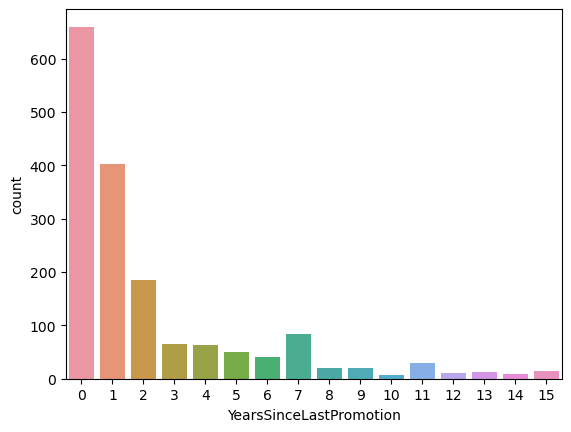

In [117]:
sns.countplot(data1.YearsSinceLastPromotion)

In [118]:
a=pd.crosstab(data1.YearsSinceLastPromotion,data1.Attrition)
chi2_contingency(a)[1]

0.0011388067616569014

# YearsWithCurrManager

In [119]:
data1.YearsWithCurrManager.value_counts()#orinal variable

2     404
0     297
7     247
3     155
8     122
4     108
1      83
9      77
5      35
6      34
10     32
11     25
12     21
13     16
17      7
15      6
14      5
16      2
Name: YearsWithCurrManager, dtype: int64

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

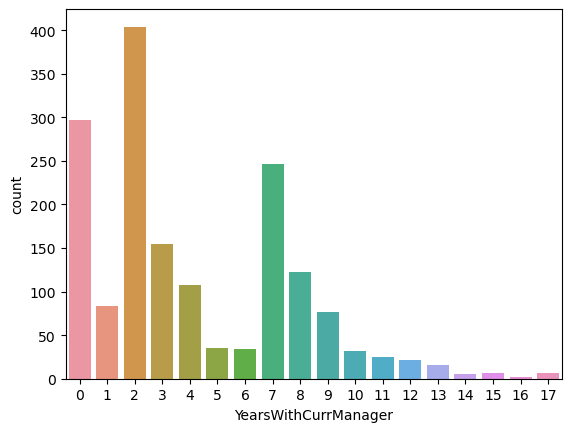

In [120]:
sns.countplot(data1.YearsWithCurrManager)

In [121]:
a=pd.crosstab(data1.YearsWithCurrManager,data1.Attrition)
chi2_contingency(a)[1]

5.957624051085805e-17

# BusinessTravel

In [122]:
data1.BusinessTravel.value_counts()#orinal variable


2    1184
1     320
0     172
Name: BusinessTravel, dtype: int64

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

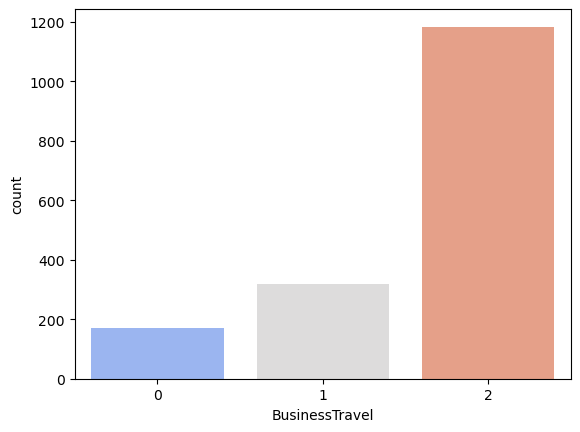

In [123]:
sns.countplot(data1.BusinessTravel,palette='coolwarm')

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

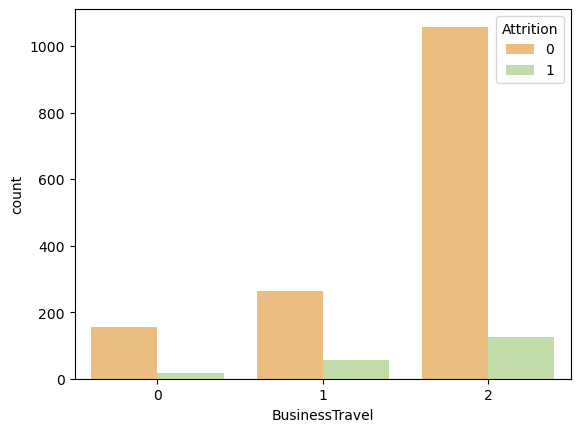

In [126]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=data1,palette='Spectral')

In [127]:
a=pd.crosstab(data1.BusinessTravel,df.Attrition)
chi2_contingency(a)[1]

0.001119456597466221

# Department

In [128]:
data1.Department.value_counts()

1    796
0    531
2    349
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

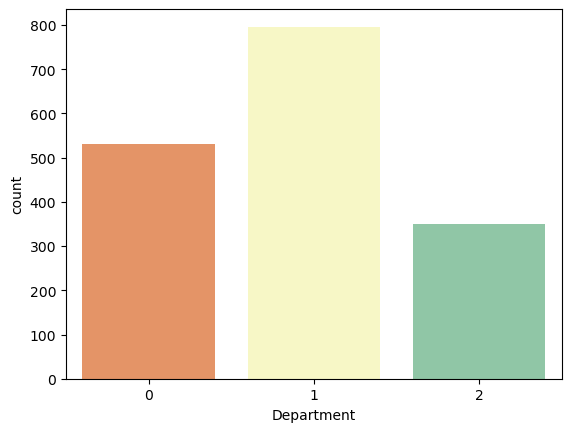

In [129]:
sns.countplot(data1.Department,palette='Spectral')

<AxesSubplot:xlabel='Department', ylabel='count'>

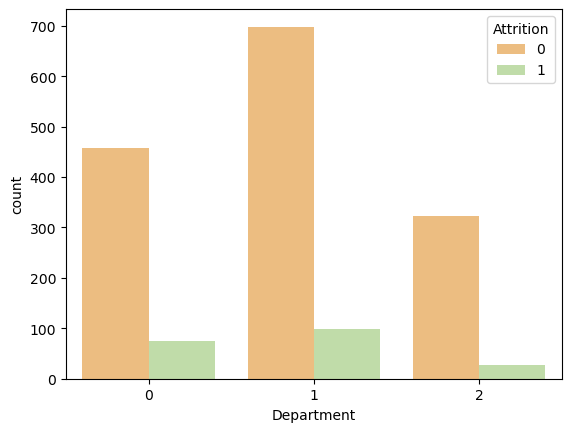

In [132]:
sns.countplot(x='Department',hue='Attrition',data=data1,palette='Spectral')

In [133]:
a=pd.crosstab(data1.Department,data1.Attrition)
chi2_contingency(a)[1]

0.018194265980794714

# EducationField

In [134]:
data1.EducationField.value_counts()

1    697
3    524
2    189
5    149
4     88
0     29
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='count'>

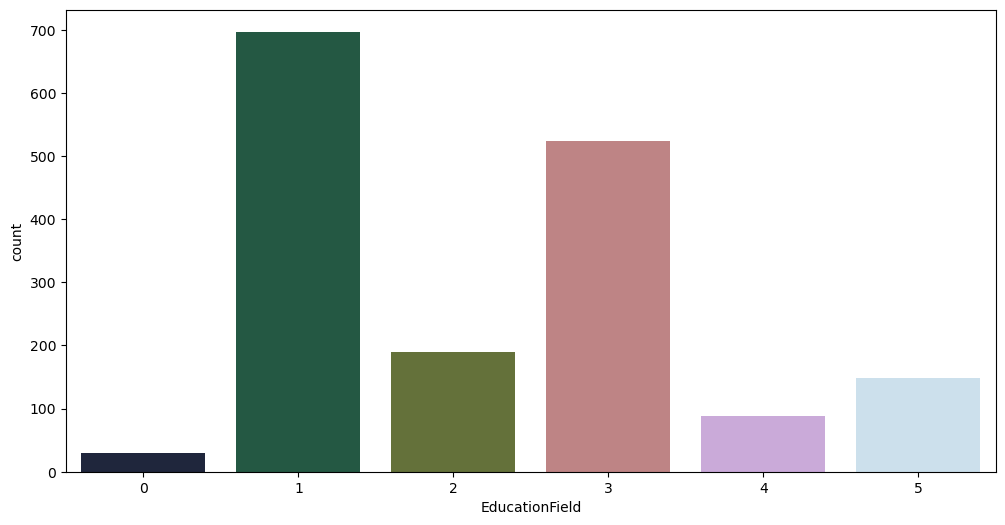

In [135]:
plt.figure(figsize=(12,6))
sns.countplot(data1.EducationField,palette='cubehelix')

<AxesSubplot:xlabel='EducationField', ylabel='count'>

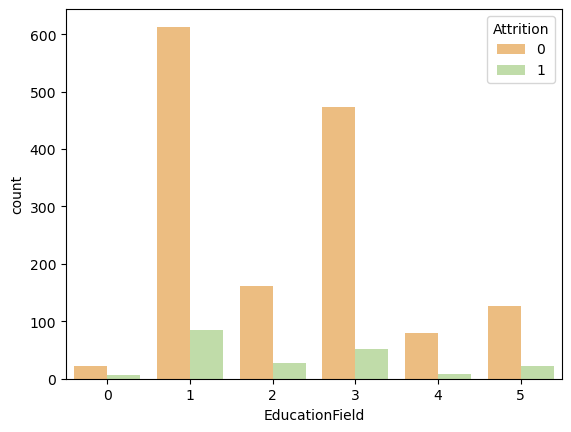

In [138]:
sns.countplot(x='EducationField',hue='Attrition',data=data1,palette='Spectral')

In [139]:
a=pd.crosstab(data1.EducationField,data1.Attrition)
chi2_contingency(a)[1]

0.1632877592033215

In [140]:
data1.drop('EducationField',inplace=True,axis=1)#because p-value is greater than 0.05

# Gender

In [141]:
data1.Gender.value_counts()

1    998
0    678
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

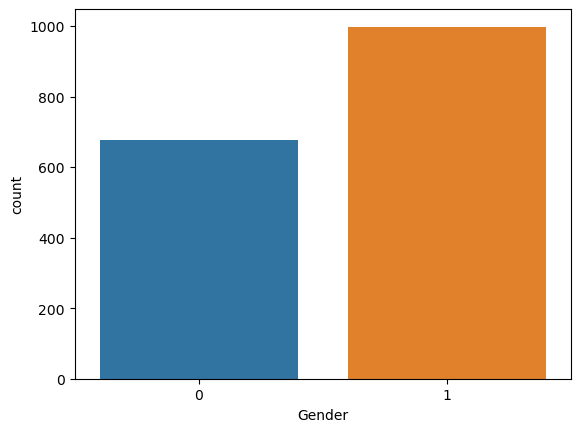

In [142]:
sns.countplot(data1.Gender)

In [143]:
a=pd.crosstab(data1.Gender,data1.Attrition)
chi2_contingency(a)[1]

0.4419454127111361

In [144]:
data1.drop('Gender',axis=1,inplace=True)#because p-value is greater than 0.05

# JobRole

In [145]:
data1.JobRole.value_counts()

2    822
3    534
4    189
1    115
0     16
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='JobRole', ylabel='count'>

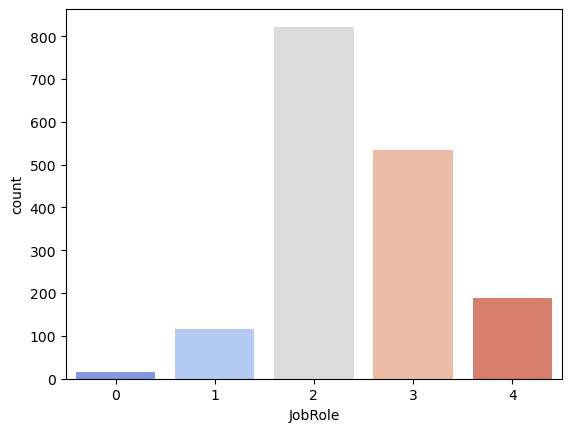

In [146]:
sns.countplot(data1.JobRole,palette='coolwarm')

<AxesSubplot:xlabel='JobRole', ylabel='count'>

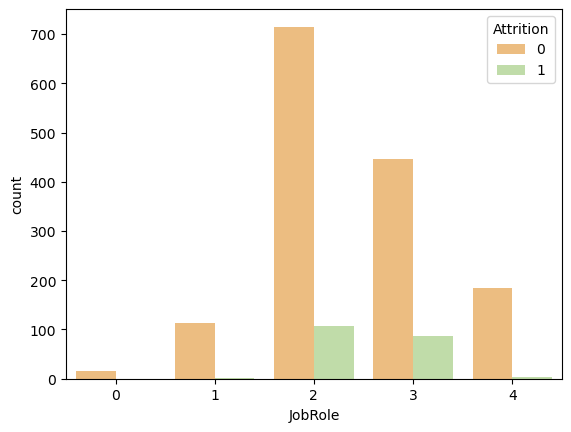

In [148]:
sns.countplot(x='JobRole',hue='Attrition',data=data1,palette='Spectral')

# MaritalStatus

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

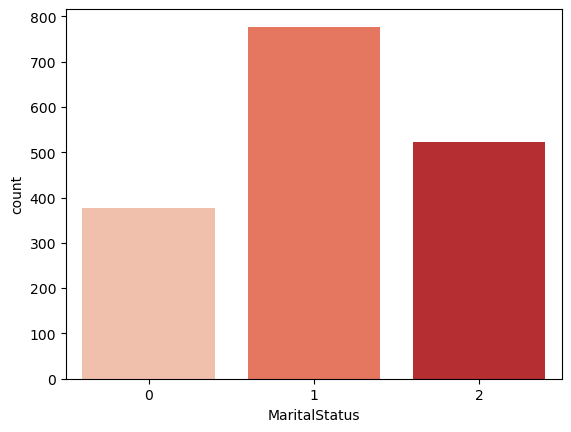

In [149]:
sns.countplot(data1.MaritalStatus,palette='Reds')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

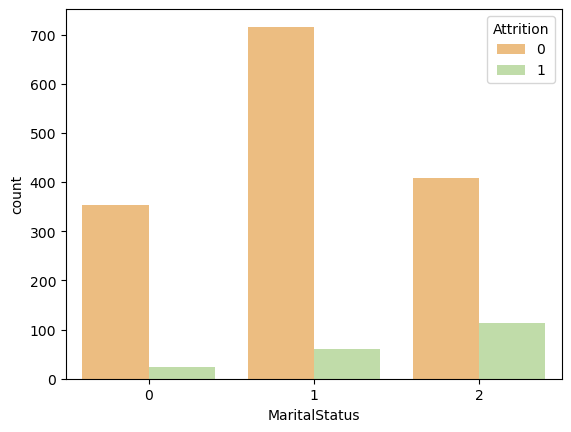

In [153]:
sns.countplot(x='MaritalStatus',hue='Attrition',data=data1,palette='Spectral')

In [154]:
a=pd.crosstab(data1.MaritalStatus,data1.Attrition)
chi2_contingency(a)[1]

1.816259262576239e-16

# Over18

In [155]:
data1.Over18.value_counts()

0    1676
Name: Over18, dtype: int64

In [156]:
data1.drop('Over18',axis=1,inplace=True)#no use

# OverTime

In [157]:
data1.OverTime.value_counts()

0    1200
1     476
Name: OverTime, dtype: int64

<AxesSubplot:xlabel='OverTime', ylabel='count'>

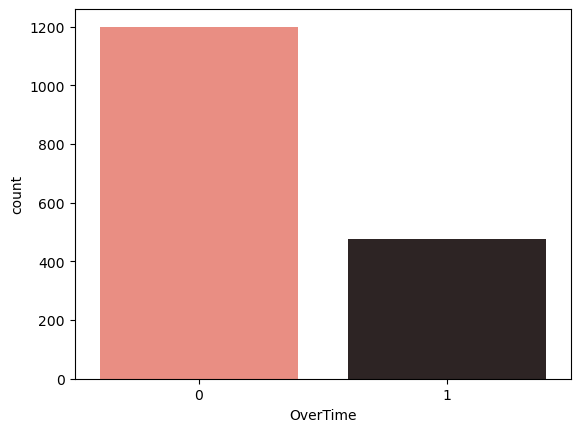

In [158]:
sns.countplot(data1.OverTime,palette='dark:salmon_r')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

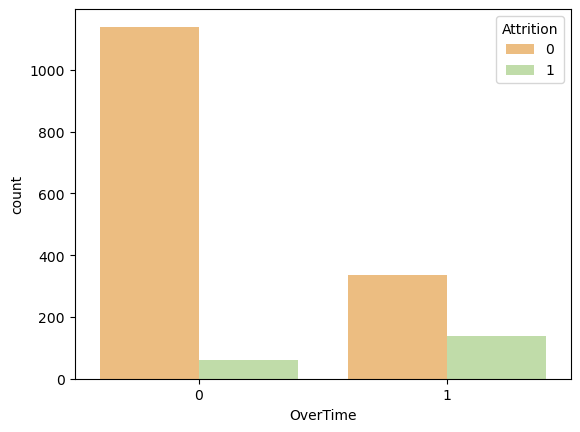

In [161]:
sns.countplot(x='OverTime',hue='Attrition',data=data1,palette='Spectral')#most of the employees worked over time left the company


In [162]:
a=pd.crosstab(data1.OverTime,data1.Attrition)
chi2_contingency(a)[1]

6.865486230870457e-43

<AxesSubplot:>

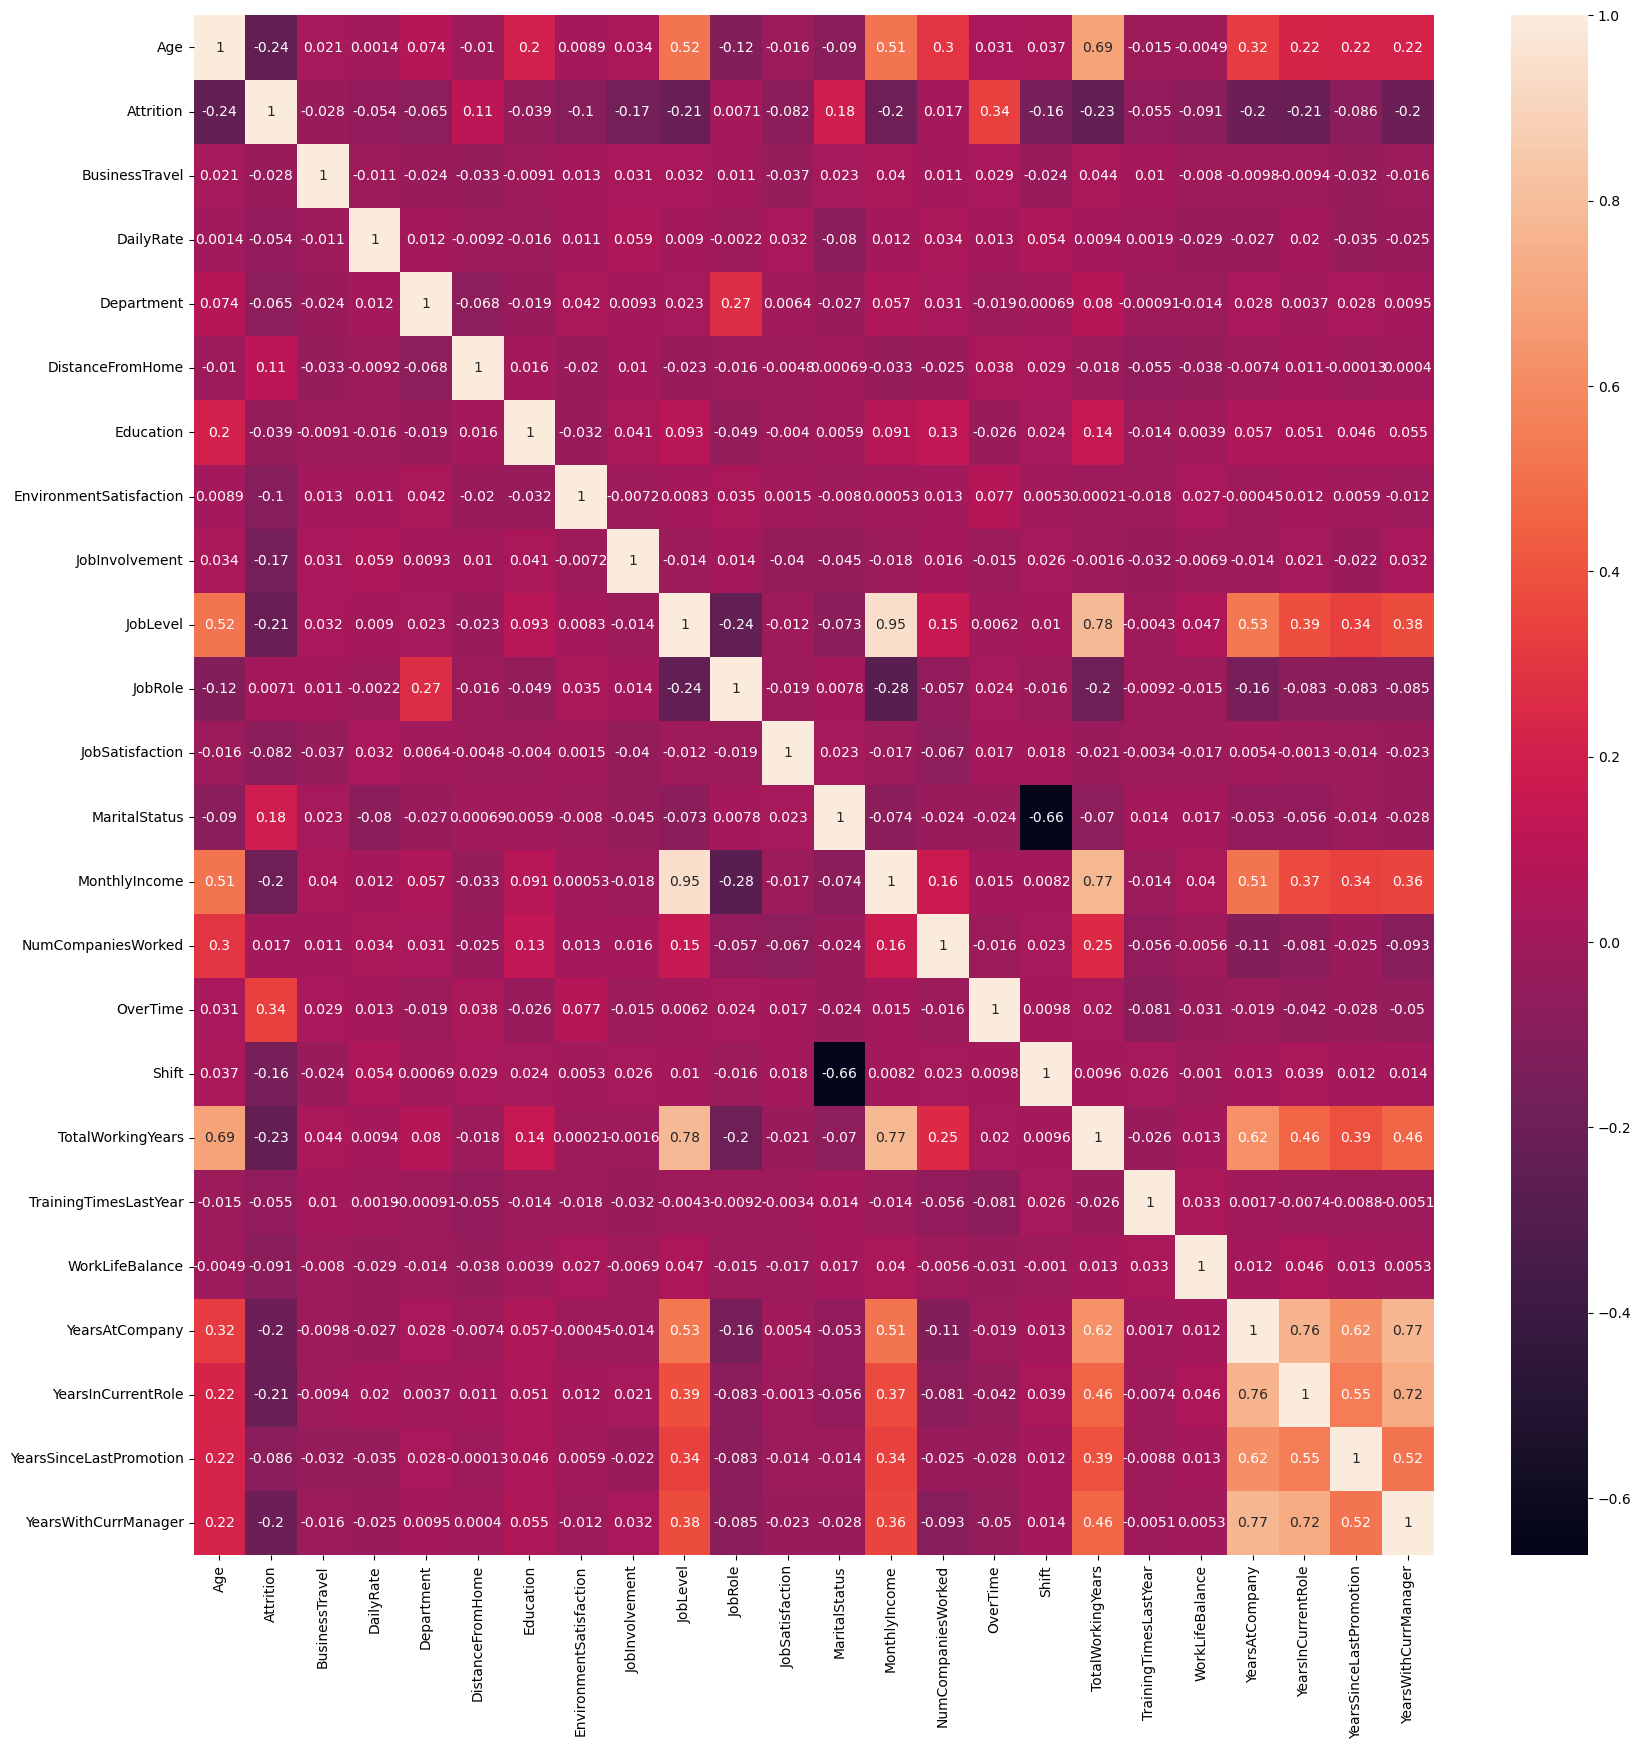

In [163]:
plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(),annot=True)#year_at_company and years_in_curentrole is correlated


In [164]:
num_col=data1.select_dtypes(include=np.number)
num_col.shape

(1676, 24)

# VIF

In [165]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [166]:
vif_da=num_col
vif_data=pd.DataFrame()
vif_data['feature']=vif_da.columns

vif_data['VIF']=[variance_inflation_factor(vif_da.values,i)for i in range(len(vif_da.columns))]
print(vif_data)

                    feature        VIF
0                       Age  31.158780
1                 Attrition   1.506875
2            BusinessTravel   6.522889
3                 DailyRate   4.886733
4                Department   2.886602
5          DistanceFromHome   2.312286
6                 Education   9.258432
7   EnvironmentSatisfaction   6.938726
8            JobInvolvement  14.073417
9                  JobLevel  46.846450
10                  JobRole  10.961329
11          JobSatisfaction   6.800715
12            MaritalStatus   5.585214
13            MonthlyIncome  32.972871
14       NumCompaniesWorked   2.729438
15                 OverTime   1.675102
16                    Shift   3.237950
17        TotalWorkingYears  14.162910
18    TrainingTimesLastYear   5.603994
19          WorkLifeBalance  14.376275
20           YearsAtCompany  10.538986
21       YearsInCurrentRole   6.564184
22  YearsSinceLastPromotion   2.463631
23     YearsWithCurrManager   6.631131


In [167]:
data1.drop(['Age','JobLevel','MonthlyIncome','JobInvolvement','JobLevel','TotalWorkingYears','WorkLifeBalance','YearsAtCompany'],inplace=True,axis=1)

In [170]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Attrition                1676 non-null   int32
 1   BusinessTravel           1676 non-null   int32
 2   DailyRate                1676 non-null   int64
 3   Department               1676 non-null   int32
 4   DistanceFromHome         1676 non-null   int64
 5   Education                1676 non-null   int64
 6   EnvironmentSatisfaction  1676 non-null   int64
 7   JobRole                  1676 non-null   int32
 8   JobSatisfaction          1676 non-null   int64
 9   MaritalStatus            1676 non-null   int32
 10  NumCompaniesWorked       1676 non-null   int64
 11  OverTime                 1676 non-null   int32
 12  Shift                    1676 non-null   int64
 13  TrainingTimesLastYear    1676 non-null   int64
 14  YearsInCurrentRole       1676 non-null   int64
 15  Year

In [173]:
x = data1.drop("Attrition",axis = 1)
y = data1["Attrition"]

In [174]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20, stratify=y)

In [175]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [176]:
p_x=lr.predict(xtest)

In [177]:
statistc_model_Logistic_Regression=accuracy_score(ytest,p_x)
statistc_model_Logistic_Regression

0.9085487077534792

# Smote

In [178]:
data1.Attrition.value_counts()

0    1477
1     199
Name: Attrition, dtype: int64

In [182]:
no=data1[data1.Attrition==1]
yes=data1[data1.Attrition==0]

from sklearn.utils import resample

over=resample(no,replace=True,n_samples=len(yes),random_state=23)

datasmote=pd.concat([yes,over])
datasmote.Attrition.value_counts()

0    1477
1    1477
Name: Attrition, dtype: int64

In [183]:
datasmote

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,Shift,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,2,1102,0,1,2,2,2,4,2,8,1,0,0,4,0,5
1,0,1,279,1,8,1,3,3,2,1,1,0,1,3,7,1,7
3,0,1,1392,1,3,4,4,3,3,1,1,1,0,3,7,3,0
4,0,2,591,1,2,1,1,2,2,1,9,0,1,3,2,2,2
5,0,1,1005,1,2,2,4,2,4,2,0,0,0,2,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,1,2,303,0,27,3,3,2,4,2,1,1,0,2,7,7,7
456,1,1,1306,0,5,3,2,3,2,2,1,1,0,3,0,0,0
1080,1,2,676,1,9,4,4,2,1,2,3,0,0,3,4,1,0
51,1,2,1434,1,5,4,3,2,3,2,1,1,0,3,2,2,2


# Data Preprocessing

In [194]:
x = datasmote.drop("Attrition",axis = 1)
y = datasmote["Attrition"]

# Logistic Regression

In [195]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [196]:
p_x=lr.predict(xtest)

In [199]:
smote_base_model_Logistic_Regression=accuracy_score(ytest,p_x)
smote_base_model_Logistic_Regression

0.9085487077534792

In [200]:
print(metrics.classification_report(ytest, p_x, labels = [0,1,2]))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       443
           1       0.82      0.30      0.44        60
           2       0.00      0.00      0.00         0

   micro avg       0.91      0.91      0.91       503
   macro avg       0.58      0.43      0.46       503
weighted avg       0.90      0.91      0.89       503



In [201]:
print(metrics.confusion_matrix(ytest, p_x))

[[439   4]
 [ 42  18]]


# RandomForest

In [206]:
x = data1.drop("Attrition",axis = 1)
y = data1["Attrition"]

In [207]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20, stratify=y)

In [208]:
rf=RandomForestClassifier(random_state=30)
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=30)

In [209]:
params={
    'n_estimators':[800,900,1000.1100],
    'max_features':['sqrt',0.25],
    'min_samples_split':[2,4,6]
}

In [210]:
gd=GridSearchCV(rf,params)

In [211]:
gd.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=30),
             param_grid={'max_features': ['sqrt', 0.25],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [800, 900, 1000.11]})

In [212]:
b=gd.best_estimator_
b

RandomForestClassifier(max_features='sqrt', min_samples_split=6,
                       n_estimators=900, random_state=30)

In [213]:
rf=RandomForestClassifier(n_estimators=1000)

In [214]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [215]:
y_pred_rand=rf.predict(xtest)

In [216]:
grid_search_acc=accuracy_score(ytest,y_pred_rand)
grid_search_acc

0.9105367793240556

In [217]:
print(classification_report(ytest,y_pred_rand))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       443
           1       0.83      0.32      0.46        60

    accuracy                           0.91       503
   macro avg       0.87      0.65      0.70       503
weighted avg       0.90      0.91      0.89       503



In [218]:
prob=rf.predict_proba(xtest)
prob

array([[0.954     , 0.046     ],
       [0.99066667, 0.00933333],
       [0.994     , 0.006     ],
       ...,
       [0.929     , 0.071     ],
       [1.        , 0.        ],
       [0.98398095, 0.01601905]])

In [219]:
#roc
fp,tp,th=roc_curve(ytest,prob[:,1])
roc_auc = auc(fp, tp) 
print(roc_auc)

0.8861173814898419


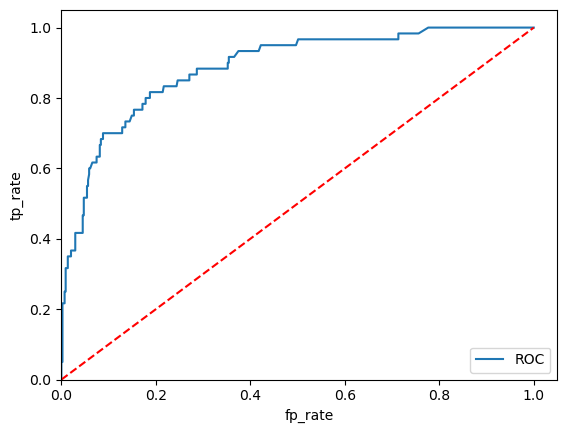

In [220]:
plt.figure()
plt.plot(fp,tp,label='ROC')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('fp_rate')
plt.ylabel('tp_rate')
plt.legend(loc='lower right')
plt.show()


In [221]:
#random search
rf=RandomForestClassifier(random_state=30)
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=30)

In [222]:
params={
    'n_estimators':[800,900,1000.1100],
    'max_features':['log2',0.25],
    'min_samples_split':[2,4,6]
}

In [223]:
gd=RandomizedSearchCV(rf,params)

In [224]:
gd.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'max_features': ['log2', 0.25],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [800, 900, 1000.11]})

In [225]:
b=gd.best_estimator_
b

RandomForestClassifier(max_features=0.25, min_samples_split=6, n_estimators=900,
                       random_state=30)

In [226]:
rf=RandomForestClassifier(n_estimators=1000)

In [227]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [228]:
y_pred_rand=rf.predict(xtest)

In [229]:
confusion_matrix(ytest,y_pred_rand)

array([[437,   6],
       [ 44,  16]], dtype=int64)

In [230]:
random_search_acc=accuracy_score(ytest,y_pred_rand)
random_search_acc

0.9005964214711729

# DecisionTree

In [231]:
from sklearn.tree import DecisionTreeClassifier

In [232]:
dt=DecisionTreeClassifier(random_state=20)

In [233]:
parm={'max_depth':[10,20,30]}

In [234]:
grid=GridSearchCV(dt,parm)

In [235]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=20),
             param_grid={'max_depth': [10, 20, 30]})

In [236]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10, random_state=20)

In [237]:
dt=DecisionTreeClassifier(max_depth=20, random_state=20)

In [238]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=20, random_state=20)

In [239]:
y_pred_dec=dt.predict(xtest)

In [240]:
confusion_matrix(ytest,y_pred_dec)

array([[411,  32],
       [ 36,  24]], dtype=int64)

In [241]:
decision_tree_acc=accuracy_score(ytest,y_pred_dec)
decision_tree_acc

0.8648111332007953

In [242]:
#classification Report
print(classification_report(ytest,y_pred_dec))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       443
           1       0.43      0.40      0.41        60

    accuracy                           0.86       503
   macro avg       0.67      0.66      0.67       503
weighted avg       0.86      0.86      0.86       503



# SVM

In [243]:
from sklearn.svm import SVC
from sklearn import svm

In [244]:
#SVC - Suppot Vector Classifier
svc =svm.SVC(class_weight='balanced',probability=True) 
td_svc = svc.fit(xtrain,ytrain)
td_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [245]:
y_pred_lin = td_svc.predict(xtest)
len(y_pred_lin)

503

In [246]:
svm_acc=accuracy_score(ytest,y_pred_lin)
svm_acc

0.6123260437375746

In [247]:
print(confusion_matrix(ytest,y_pred_lin))

[[277 166]
 [ 29  31]]


In [248]:
print(classification_report(ytest,y_pred_lin))

              precision    recall  f1-score   support

           0       0.91      0.63      0.74       443
           1       0.16      0.52      0.24        60

    accuracy                           0.61       503
   macro avg       0.53      0.57      0.49       503
weighted avg       0.82      0.61      0.68       503



# KNN

In [249]:
params={'n_neighbors':np.arange(1,40,1)}

In [250]:
gd.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'max_features': ['log2', 0.25],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [800, 900, 1000.11]})

In [251]:
gd.best_params_

{'n_estimators': 900, 'min_samples_split': 6, 'max_features': 'log2'}

In [252]:
from sklearn.neighbors import KNeighborsClassifier

In [253]:
knn=KNeighborsClassifier(n_neighbors=1000,algorithm='ball_tree')
knn.fit(xtrain,ytrain)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1000)

In [254]:
y_pred_knn=knn.predict(xtest)

In [255]:
#accuracy score
knn_ball_tree_acc=accuracy_score(ytest,y_pred_knn)
knn_ball_tree_acc

0.8807157057654076

In [256]:
print(classification_report(ytest,y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       443
           1       0.00      0.00      0.00        60

    accuracy                           0.88       503
   macro avg       0.44      0.50      0.47       503
weighted avg       0.78      0.88      0.82       503



In [257]:
confusion_matrix(ytest,y_pred_knn)

array([[443,   0],
       [ 60,   0]], dtype=int64)

In [258]:
knn=KNeighborsClassifier(n_neighbors=1100,algorithm='kd_tree')
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1100)

In [259]:
y_pred_knn=knn.predict(xtest)

In [260]:
knn_kd_tree_acc=accuracy_score(ytest,y_pred_knn)
knn_kd_tree_acc

0.8807157057654076

# Naive Bayes

In [261]:
from  sklearn.naive_bayes import GaussianNB

In [262]:
gn=GaussianNB()

In [263]:
gn.fit(xtrain,ytrain)

GaussianNB()

In [264]:
y_pred_nb=gn.predict(xtest)

In [265]:
naive_bayes_acc=accuracy_score(ytest,y_pred_nb)
naive_bayes_acc

0.8747514910536779

In [267]:
print('Accuracy for Logistic regression Base model:',base_model_logistic_regression*100)
print('Accuracy for Logistic regression statistical method:',statistc_model_Logistic_Regression*100)
print('Accuracy for Logistic regression Smote:',smote_base_model_Logistic_Regression*100)
print('Accuracy for Decision_tree method:',decision_tree_acc*100)
print('Accuracy for Random forest_Gridsearch method:',grid_search_acc*100)
print('Accuracy for Random forest_Randomsearch:',random_search_acc*100)
print('Accuracy for Naive_Bayes_classifier:', naive_bayes_acc*100)
print('Accuracy for KNN kd tree:',knn_kd_tree_acc*100)
print('Accuracy for KNN ball tree:',knn_ball_tree_acc*100)
print('Accuracy for SVM:',svm_acc*100)


Accuracy for Logistic regression Base model: 88.27037773359841
Accuracy for Logistic regression statistical method: 90.85487077534792
Accuracy for Logistic regression Smote: 90.85487077534792
Accuracy for Decision_tree method: 86.48111332007953
Accuracy for Random forest_Gridsearch method: 91.05367793240556
Accuracy for Random forest_Randomsearch: 90.05964214711729
Accuracy for Naive_Bayes_classifier: 87.47514910536779
Accuracy for KNN kd tree: 88.07157057654076
Accuracy for KNN ball tree: 88.07157057654076
Accuracy for SVM: 61.23260437375746
